In [ ]:
import snscrape.modules.twitter as sntwitter
from datetime import datetime
import time
import random
import pandas as pd
from dotenv import load_dotenv
import os
import textdistance
import nltk
import emoji
nltk.download('stopwords')

from nltk.corpus import stopwords



twitter_username = os.getenv("TWT_USERNAME")
twitter_password = os.getenv("TWT_PASSWORD")

In [138]:
twitter_user = sntwitter.TwitterUserScraper("mansuryavas06")
tweet_data = []
for i, tweet in enumerate(twitter_user.get_items()):
    if i == 2000:
        break


    tweet_data.append(tweet)

In [139]:
df=pd.DataFrame(tweet_data)
df.head()


,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/mansuryavas06/status/16110...,2023-01-05 16:19:30+00:00,Etimesgut İstasyon Caddesi'nin yapımını altyap...,Etimesgut İstasyon Caddesi'nin yapımını altyap...,1611034666223411204,"{'username': 'mansuryavas06', 'id': 246181702,...",129,250,2676,20,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,None,None,None,None,None
1,https://twitter.com/mansuryavas06/status/16109...,2023-01-05 12:33:08+00:00,Masum canları korumak için kahramanca canını f...,Masum canları korumak için kahramanca canını f...,1610977697110364161,"{'username': 'mansuryavas06', 'id': 246181702,...",51,322,6283,10,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,NaN,None,None,None,None,None,None
2,https://twitter.com/mansuryavas06/status/16109...,2023-01-05 07:24:47+00:00,Hiçbir çocuk üşümesin diye bir ilke imza atara...,Hiçbir çocuk üşümesin diye bir ilke imza atara...,1610900100766646272,"{'username': 'mansuryavas06', 'id': 246181702,...",123,426,4417,9,...,None,None,{'url': 'https://twitter.com/mansuryavas06/sta...,NaN,None,None,None,None,None,None
3,https://twitter.com/mansuryavas06/status/16108...,2023-01-05 06:33:36+00:00,Adana’mızın kurtuluşunun 101. yılı kutlu olsun...,Adana’mızın kurtuluşunun 101. yılı kutlu olsun...,1610887219891568640,"{'username': 'mansuryavas06', 'id': 246181702,...",31,160,2895,6,...,None,None,{'url': 'https://twitter.com/ZeydanKaralar01/s...,NaN,None,None,None,None,None,None
4,https://twitter.com/mansuryavas06/status/16106...,2023-01-04 17:43:32+00:00,Beypazarı'nda 6 bin 200 metrekarelik alana kur...,Beypazarı'nda 6 bin 200 metrekarelik alana kur...,1610693424767799302,"{'username': 'mansuryavas06', 'id': 246181702,...",68,282,4001,7,...,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,None,None,NaN,None,None,None,None,None,None


In [140]:
df.to_csv("sonuclar.csv",index=False)

In [141]:
import re
import string

def clean_tweet(tweet):
    tweet=tweet.lower()
     # Tweet içindeki emoji'leri temizleyin
    tweet = emoji.demojize(tweet)
    tweet = re.sub(":smiling_face_with_smiling_eyes", "", tweet)
    tweet=re.sub("https?://\S+","",tweet)
    tweet = tweet.replace("\n", " ")

    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    tweet_tokens = tweet.split(" ")
    filtered_tokens = [token for token in tweet_tokens if token not in stopwords.words('english') and token not in stopwords.words('turkish')]
    tweet = " ".join(filtered_tokens)

    # Kendi stopwords listesi oluşturun
    stopwords_list = sorted(['in', 'bir', 'milyon', 'milyar','tl','bin','ilk','nin','ni','ye','sn'])
    
    # Tweet içindeki kendi stopwords'lerini temizleyin
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords_list]
    tweet = " ".join(filtered_tokens)

   
    # Boşluk karakterlerini temizleyin
    tweet = tweet.strip()
    
    # Sayıları temizleyin
    tweet = re.sub(r'\d+', '', tweet)
    
    # @mentions'ları temizleyin
    tweet = re.sub(r'@[\w_]+', '', tweet)
    
    # #hashtags'leri temizleyin
    tweet = re.sub(r'#[\w_]+', '', tweet)

    

    
    
    return tweet


In [142]:
clean_tweet(df["content"][1])

'masum canları korumak kahramanca canını feda eden şehit polis memurumuz fethi sekini rahmet minnetle anıyorum'

In [143]:
df["clean"] = df.apply(lambda row: clean_tweet(row["content"]), axis=1)

In [144]:
df["clean"][:5]

0    etimesgut i̇stasyon caddesinin yapımını altyap...
1    masum canları korumak kahramanca canını feda e...
2    hiçbir çocuk üşümesin ilke imza atarak doğalga...
3    adana’mızın kurtuluşunun  yılı kutlu olsun Tur...
4    beypazarında   metrekarelik alana kurduğumuz e...
Name: clean, dtype: object

In [145]:
cleaned_df=df[['clean']]
cleaned_df.to_csv('cleanedtweets.csv',index=False)

In [146]:
cleaned_df.head()

,clean
0,etimesgut i̇stasyon caddesinin yapımını altyap...
1,masum canları korumak kahramanca canını feda e...
2,hiçbir çocuk üşümesin ilke imza atarak doğalga...
3,adana’mızın kurtuluşunun yılı kutlu olsun Tur...
4,beypazarında metrekarelik alana kurduğumuz e...


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer nesnesi oluşturun
vectorizer = TfidfVectorizer()

# Tweetleri vektörize edin
vectors = vectorizer.fit_transform(df["clean"])

In [148]:
from sklearn.cluster import KMeans

# KMeans nesnesi oluşturun
kmeans = KMeans(n_clusters=5)

# Tweetleri gruplara ayırın
clusters = kmeans.fit_predict(vectors)

# TfidfVectorizer nesnesinin vocabulary_ özelliğini kullanarak
# tweetlerin içindeki kelimelere ait frekans bilgilerini tutan bir sözlük oluşturun
vocab_dict = {v: k for k, v in vectorizer.vocabulary_.items()}

# Grupların oluşturulma kriterleri olarak adlandırılan grupların ortalama vektörlerini
# kelimelere çevirin
group_centers = kmeans.cluster_centers_
group_words = []
for group in group_centers:
    group_words.append([vocab_dict[index] for index in group.argsort()[-5:][::-1]])




# Grupların oluşturulma kriterleri olarak adlandırılan grupların ortalama vektörlerini
# kelimelere çevirin
group_centers = kmeans.cluster_centers_
group_words = []
for group in group_centers:
    group_words.append([vocab_dict[index] for index in group.argsort()[-5:][::-1]])


# Tweetleri gruplara göre ayırın
clustered_tweets = [[] for _ in range(5)]
for i, cluster in enumerate(clusters):
    clustered_tweets[cluster].append(df["clean"][i])





#print("Grupların oluşturulma kriterleri:")
#print(kmeans.cluster_centers_)

# Grupları ve bu grupların oluşturulma kriterlerini görüntüleyin
for i, group in enumerate(group_words):
    print(f"Grup {i}: {group}")





  # Grupların oluşturulma kriterlerini göster
for i, cluster in enumerate(kmeans.cluster_centers_):
    print(f"Grup {i} ({len(clustered_tweets[i])} tweet):")
    print("-------------------------------")
    for ind in cluster.argsort()[-10:][::-1]:
        print(vocab_dict[ind])
    print("\n")  


# Grupları ve bu grupların içindeki tweetleri görüntüleyin
for i, cluster in enumerate(clustered_tweets):
    print(f"Grup {i}: {len(cluster)} tweet")
    print("-------------------------------")
    for tweet in cluster:
        print(tweet)
    print("\n")





Grup 0: ['rahmet', 'başsağlığı', 'şehit', 'diliyorum', 'sabır']
Grup 1: ['günaydın', 'huzur', 'sağlık', 'hafta', 'ye']
Grup 2: ['ankara', 'devam', 'olsun', 'yıl', 'anıyorum']
Grup 3: ['geçmiş', 'dileklerimi', 'olsun', 'iletiyorum', 'vatandaşlarımıza']
Grup 4: ['belediye', 'büyükşehir', 'canlı', 'olarak', 'izleyebilirsiniz']
Grup 0 (255 tweet):
-------------------------------
rahmet
başsağlığı
şehit
diliyorum
sabır
sağ
allahtan
ailesine
allah
tan


Grup 1 (34 tweet):
-------------------------------
günaydın
huzur
sağlık
hafta
ye
türkiye
bereket
ülkemizin
dört
dolu


Grup 2 (1544 tweet):
-------------------------------
ankara
devam
olsun
yıl
anıyorum
turkey
birlikte
bugün
ediyorum
kutluyorum


Grup 3 (80 tweet):
-------------------------------
geçmiş
dileklerimi
olsun
iletiyorum
vatandaşlarımıza
meydana
gelen
herhangi
iletiyor
kayıp


Grup 4 (87 tweet):
-------------------------------
belediye
büyükşehir
canlı
olarak
izleyebilirsiniz
ortak
başkanı
başkanımız
başkanları
toplantımızı


Gru

In [149]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

In [150]:
vectorizer_two = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer_two.fit_transform(df["clean"])


In [151]:
# https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf
lda = LatentDirichletAllocation(n_components=8, random_state=42)


In [152]:
# 1 - 2 dk
lda.fit(X)

LatentDirichletAllocation(n_components=8, random_state=42)

In [153]:
def plot_top_words(model, feature_names, n_top_words=10, title="clean"):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [154]:
feature_names = vectorizer_two.get_feature_names()


In [155]:
feature_names[:15]


['ab',
 'abb',
 'abdi',
 'abdullah',
 'abluka',
 'abonmanlarından',
 'abonmanlarınız',
 'acil',
 'acı',
 'acıları',
 'acımız',
 'acının',
 'acısı',
 'acısını',
 'ad']

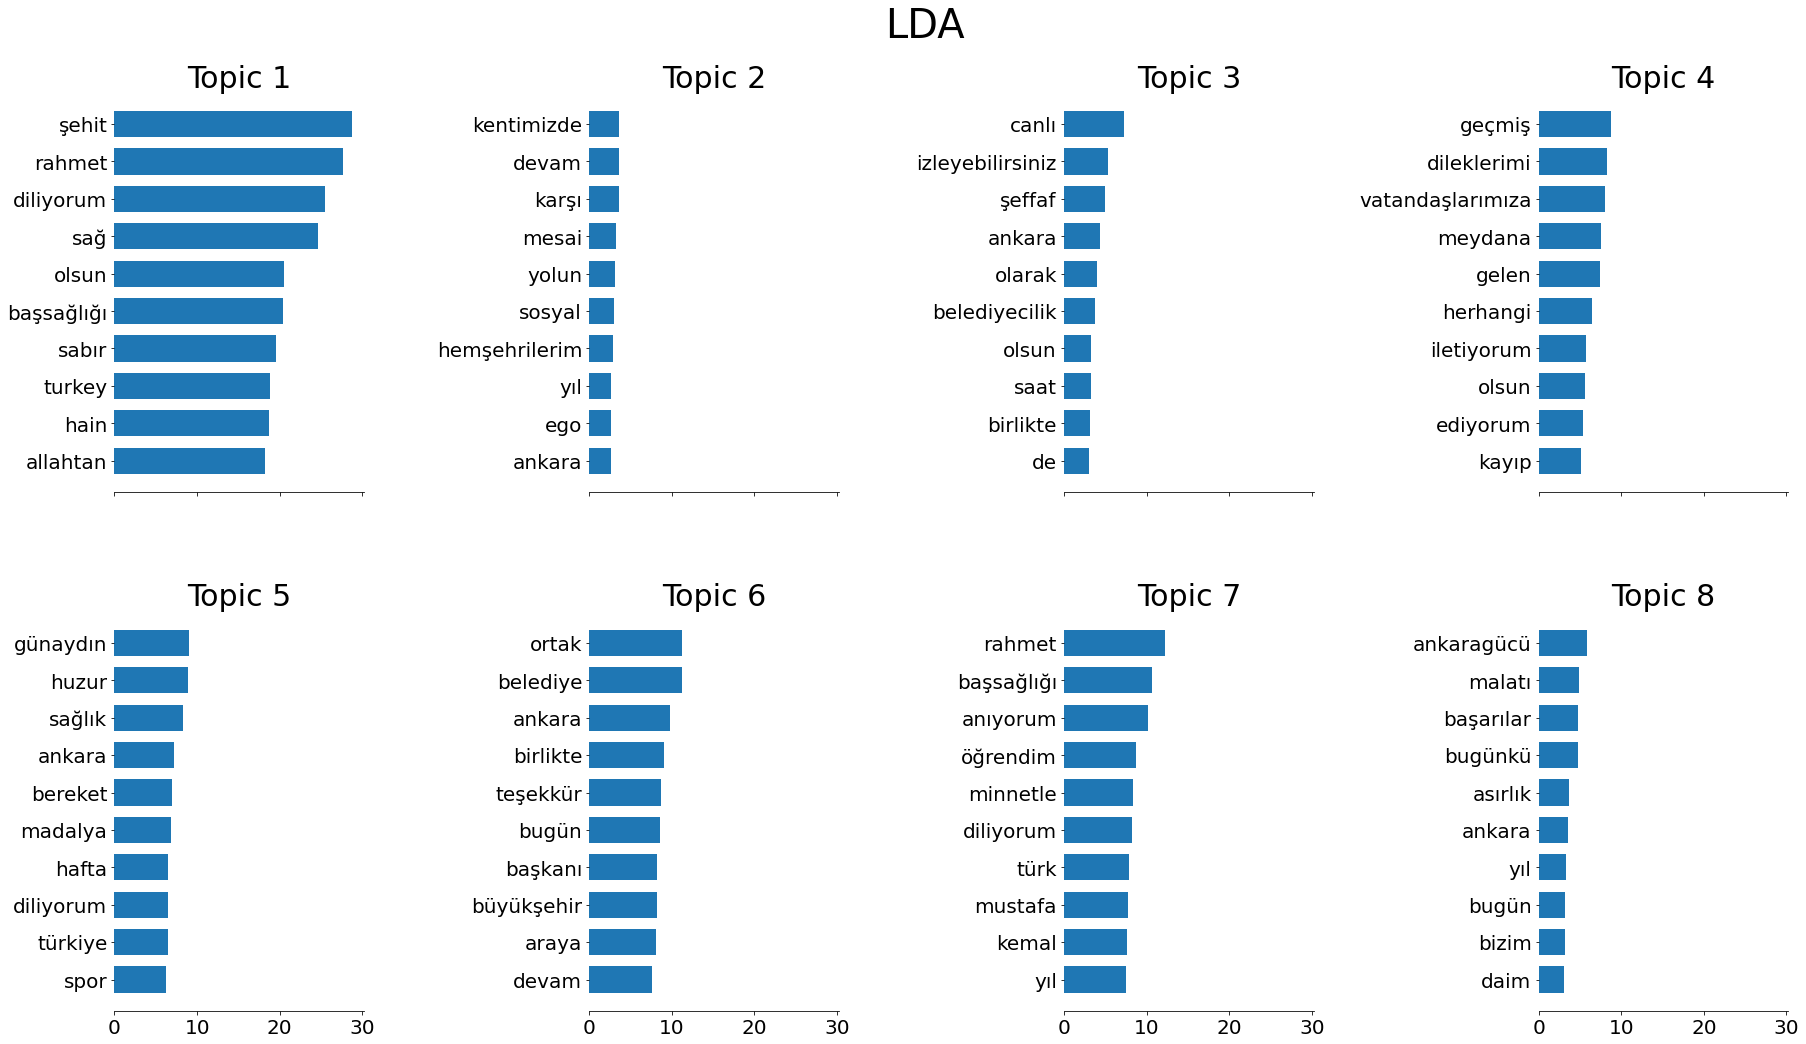

In [156]:
plot_top_words(lda, feature_names, title="LDA")
